In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.linalg
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
# import data from scikit learn
from sklearn.datasets import load_breast_cancer

In [4]:
cancer = load_breast_cancer()

In [5]:
print(type(cancer))

<class 'sklearn.utils._bunch.Bunch'>


In [6]:
print(cancer.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [7]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
print(cancer['target_names'])

['malignant' 'benign']


In [9]:
df = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

In [10]:
print(df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()
scaler.fit(df)

StandardScaler()

In [13]:
scaled_data = scaler.transform(df)
scaled_data = scaled_data.transpose()

In [14]:
print(scaled_data.shape)

(30, 569)


In [15]:
U, s, VT = scipy.linalg.svd(scaled_data)

In [16]:
k = 2 
Uk = U[:,0:k]
print(Uk.shape)

(30, 2)


In [17]:
x_pca = Uk.transpose()@scaled_data

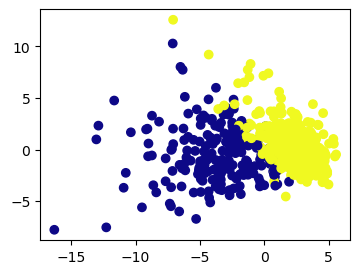

In [18]:
plt.figure(figsize=(4,3))
plt.scatter(x_pca[0,:],x_pca[1,:],c=cancer['target'],cmap='plasma')

In [19]:
df_comp = pd.DataFrame(Uk.transpose(),columns=cancer['feature_names'])

<Axes: >

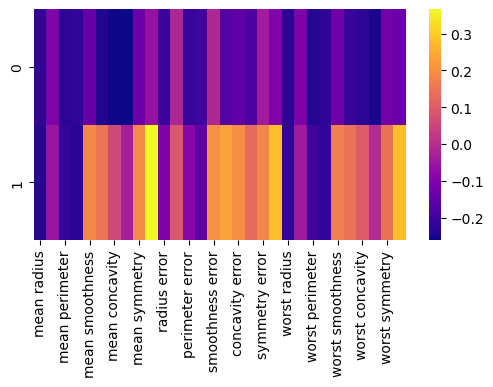

In [20]:
plt.figure(figsize=(6,3))
sns.heatmap(df_comp,cmap='plasma')